In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Chain barrier

Read and plot points from the provided picture

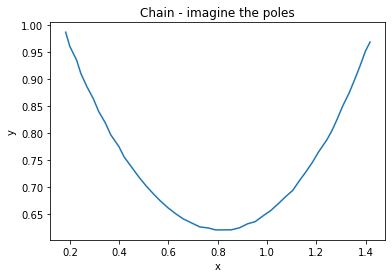

In [2]:
df = pd.read_csv('chain_01.csv', header=None, names=['x','y'])
plt.title("Chain - imagine the poles")
plt.xlabel("x")
plt.ylabel('y')
plt.plot(df['x'], df['y'])

In [3]:
g = 9.8
dt = 0.05

def euler_to_the_right(Ti, endY):
    """
    This function calculates T for the part of chain going from the lowest point to the rightmost point
    """
    x_min = df['x'][df.idxmin(0)[1]] # find value of x for smallest y
    x_max = df['x'].iloc[-1] # get value of x for the last element
    length = len(np.arange(x_min,x_max,dt)) # number of points we will use
    xs = np.zeros(length)
    y = np.zeros(length)
    z = np.zeros(length)
    y[0] = df.min(0)[1] # get y coordinate of the lowest point

    for i in range(len(xs) - 1):
        xs[i+1] = xs[i] + dt
        z[i+1] = z[i] + (np.sqrt(1+z[i]**2)*(g/Ti))*dt
        y[i+1] = y[i] + z[i]*dt
    return y[-1] - endY


def euler_to_the_left(Ti, endY):
    """
    This function calculates T for the part of chain going from the lowest point to the leftmost point
    Code is analogous to the above function (they coud've been unified) with the exception of x coordinates
    """
    x_min = df['x'][df.idxmin(0)[1]] # find value of x for smallest y
    x_max = df['x'].iloc[0] # get value of x for the first element
    length = len(np.arange(x_min,x_max,-dt))
    xs = np.zeros(length)
    y = np.zeros(length)
    z = np.zeros(length)
    y[0] = df.min(0)[1]

    for i in range(len(xs) - 1):
        xs[i+1] = xs[i] + dt
        z[i+1] = z[i] + (np.sqrt(1+z[i]**2)*(g/Ti))*dt
        y[i+1] = y[i] + z[i]*dt
    return y[-1] - endY

def bisection(f, a, b, endY, eps):
    """This is just simple bisection function"""
    while (b-a) >= eps:
        fa = f(a, endY)
        fb = f(b, endY)
        if fa*fb <= 0:
            x = (a+b)/2
            fx = f(x, endY)
            if fa*fx <= 0:
                b = x
            else:
                a = x
    return a


print("Going to the right - T: %f" %bisection(euler_to_the_right, 3, 10, df['y'].iloc[-1], 0.01))
print("Going to the left - T: %f" %bisection(euler_to_the_left, 3, 10, df['y'].iloc[0], 0.01))

Going to the right - T: 5.037109
Going to the left - T: 4.825195


The difference in the results in the end (different Ts when going in different directions) comes from different end point, which were measured "by hand"